In [1]:
"""
author: Nora Helgeland
date: May, 2023

"""

import numpy as np
import pandas as pd
from datetime import datetime
import time
import csv
import readline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import os
#from netCDF4 import Dataset, num2date, date2num
import math
import sys
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import xarray
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gc
from numpy import datetime64
import fimex_xarray
from netCDF4 import Dataset
import time
import sys
from radiosonde_class2 import Radiosonde_csv
from radiosonde_class import Radiosonde
from tqdm import tqdm
import os
import matplotlib as mpl
import seaborn as sns
import glob as glob
from tqdm import tqdm
import geopy.distance
import plotly.express as px
import statistics
from scipy import stats

Polar Plots

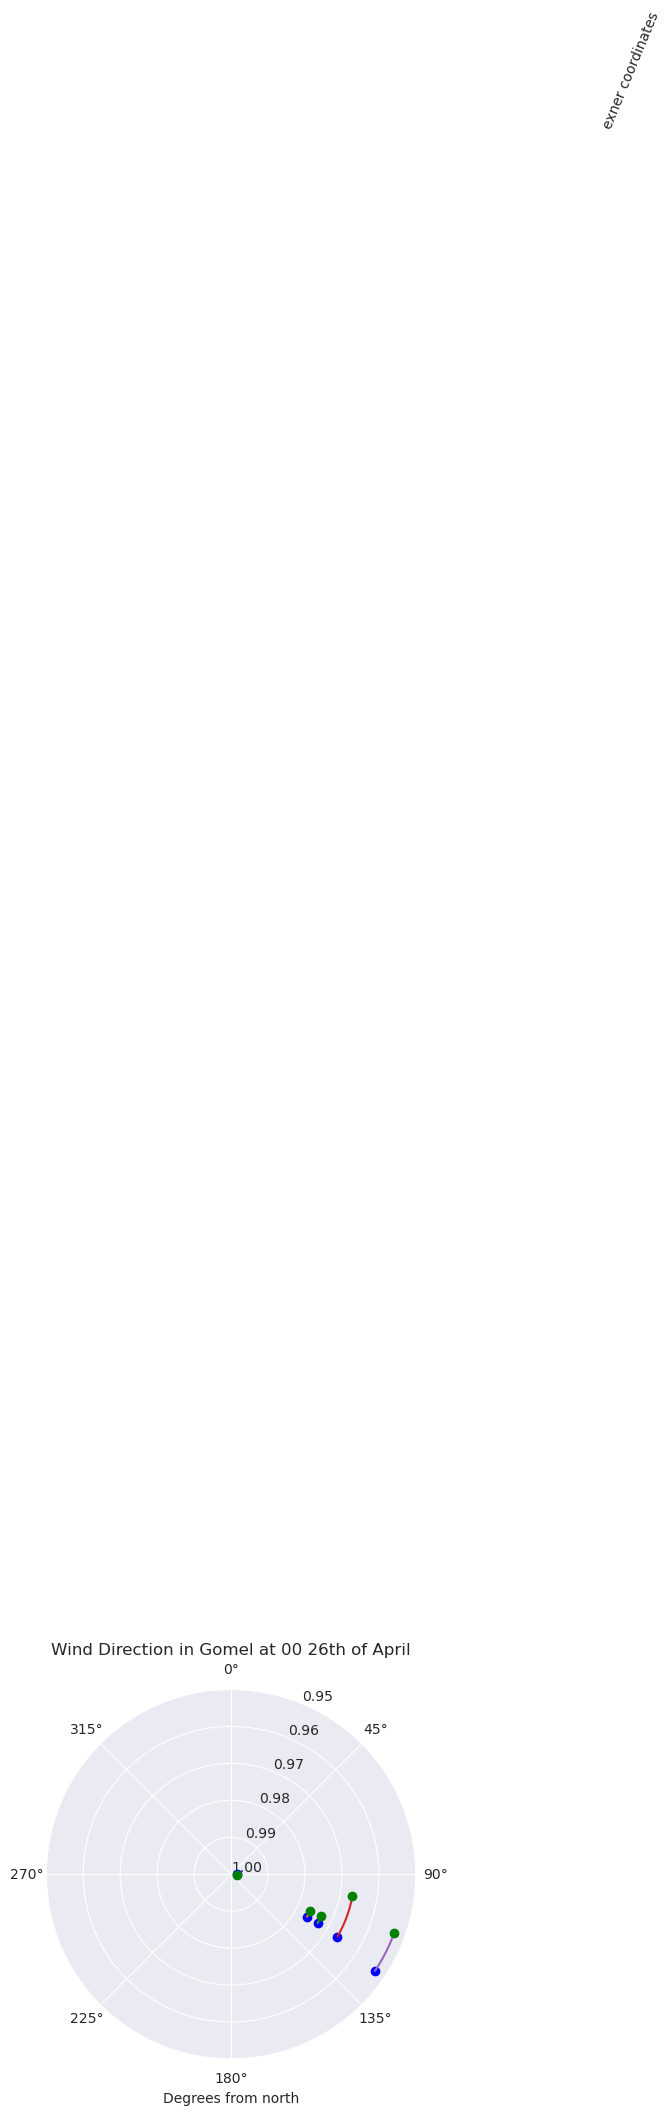

In [7]:
file="/home/norah/master/data/trial_folder_era5/wdir/2600_wdir/52.45_31.0_wdir_model.nc"  #Need to be changed for each station
limit=0

wind_data=xarray.open_dataset(file) 

file_list1=file.strip("_wdir_model.nc")
file_list=file_list1.split("_")

b = datetime64('1986-04-26T00:00:00.000000000')
Radiosonde1 = Radiosonde_csv("/home/norah/master/Rs_data_bufr/1986042600/52.45_31.0.csv",b)

wdir = wind_data["wdir_model"].values
exner = wind_data["exner"].values
#sonde_object.make_exner_levs(data["surface_air_pressure"].values.squeeze())
Radiosonde1.data =Radiosonde1.data.loc[np.where(exner[0])[0][0]+1:].reset_index()



fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.radians(wdir[limit:]), exner[limit:], "bo", label="interpolated model")

def linspace2d(start, stop, num):
    assert len(start) == len(stop)
    output = np.ones([num, len(start)]) * np.nan
    for i, (sta, sto) in enumerate(zip(start, stop)):
        sta = sta % (2*np.pi)
        sto = sto % (2*np.pi)
        a_diff = (sto - sta)
        if abs(a_diff) >= np.pi:
            sta += 2*np.pi
        output[:, i] = np.linspace(sta, sto, num=num)
    return output

M = 50
sns.set_style(style="darkgrid")

thetas = linspace2d(np.radians(wdir[limit:]), np.radians(Radiosonde1.data["windDirection"]), M)  #Has to be changed for each radiosonde
ax.set_rlim(bottom=1, top=0.95)
ax.plot(thetas, np.broadcast_to(exner[limit:], thetas.shape))
ax.set_theta_zero_location("N")  # theta=0 at the top

ax.set_theta_direction(-1) 

ax.plot(np.radians(Radiosonde1.data["windDirection"][limit:]),exner[limit:], "go", label="radiosonde")

#ax.set_rmax(0.6) #Neew to be changed to look at different vertical areas
ax.set_xlabel("Degrees from north")

ax.set_title("Wind Direction in Gomel at 00 26th of April")
label_position=ax.get_rlabel_position()
ax.text(np.radians(label_position-10),ax.get_rmax()/2.,'exner coordinates',
        rotation=label_position+45,ha='center',va='center')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0       165.137615
1       832.823649
2      1068.977234
3      1305.130819
4      1541.284404
5      2007.475365
6      2452.259599
7      3103.975535
8      3642.201835
9      4696.568128
10     5187.223921
11     5677.879715
12     6477.573904
13     7277.268094
14     7920.489297
15     8563.710499
16     9206.931702
17     9600.067958
18     9796.636086
19    10386.340469
20    11846.075433
21    13092.422698
22    13715.596330
23    16304.791030
24    16304.791030
25    16304.791030
26    16304.791030
27    16304.791030
28    16304.791030
Name: height, dtype: float64
[0.99873391 0.97671156 0.97337549 0.96692616 0.95337467 0.92264618
 0.91312485 0.90187808 0.89780184 0.85041322 0.83199956 0.8191345
 0.79582831 0.76849129 0.73482049 0.71314082 0.70779334 0.70303012
 0.69111416 0.67183192 0.63029574 0.60468748 0.58051293 0.51695149
 0.45151624 0.43434125 0.40446079 0.35011154 0.28455643]


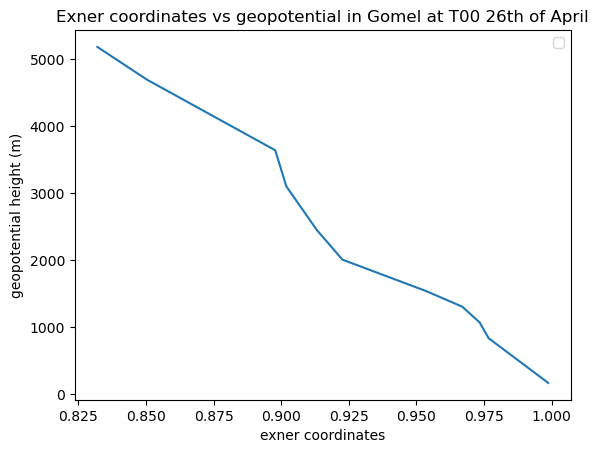

In [4]:
#compare the exnr coordinates and the geopotential height

file="/home/norah/master/data/trial_folder_bufr/wdir/2600_wdir/52.45_31.0_wdir_model.nc"  #Need to be changed for each station
limit=0

wind_data=xarray.open_dataset(file) 

file_list1=file.strip("_wdir_model.nc")
file_list=file_list1.split("_")

b = datetime64('1986-04-26T00:00:00.000000000')
Radiosonde1 = Radiosonde_csv("/home/norah/master/Rs_data_bufr/1986042600/52.45_31.0.csv",b)

wdir = wind_data["wdir_model"].values
exner = wind_data["exner"].values
#sonde_object.make_exner_levs(data["surface_air_pressure"].values.squeeze())
Radiosonde1.data =Radiosonde1.data.loc[np.where(exner[0])[0][0]+1:].reset_index()
print(Radiosonde1.data["height"])
print(exner)
plt.plot(exner[:11], Radiosonde1.data["height"][:11])
plt.legend()
plt.xlabel("exner coordinates")
plt.ylabel("geopotential height (m)")
plt.title("Exner coordinates vs geopotential in Gomel at T00 26th of April")
#plt.savefig("/home/norah/master/pictures/00_26/wspeed_NO_1415.png")
plt.show()

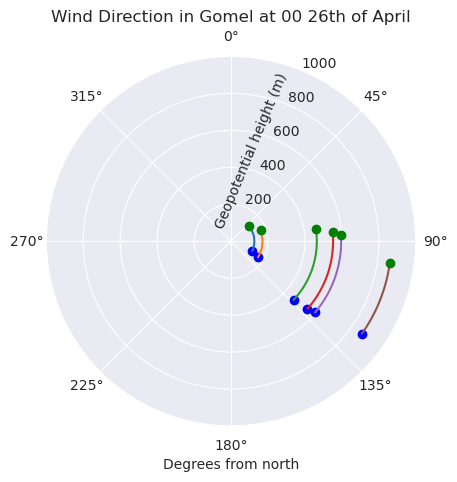

In [20]:
file="BY_33041_52.45_31.0_wdir_model.nc"  #Need to be changed for each station
limit=0

wind_data=xarray.open_mfdataset("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data00_26/"+file) 

file_list1=file.strip("_wdir_model.nc")
file_list=file_list1.split("_")

lat = float(file_list[2])
long = float(file_list[3])
b = datetime64('1986-04-26T00:00:00.000000000')
Radiosonde1 = Radiosonde("/home/norah/master/RS_data/RS_00_26_04_1986/"+file_list1+".txt", lat, long,b)

Radiosonde1.find_horizontal_disp()
wdir = wind_data["wdir_model"].values
height = wind_data["height"].values
x = np.stack([wdir, Radiosonde1.data["DRCT(deg)"]])
y = np.stack([height, height])
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(np.radians(wdir[limit:]), height[limit:], "bo", label="interpolated model")

def linspace2d(start, stop, num):
    assert len(start) == len(stop)
    output = np.ones([num, len(start)]) * np.nan
    for i, (sta, sto) in enumerate(zip(start, stop)):
        sta = sta % (2*np.pi)
        sto = sto % (2*np.pi)
        a_diff = (sto - sta)
        if abs(a_diff) >= np.pi:
            sta += 2*np.pi
        output[:, i] = np.linspace(sta, sto, num=num)
    return output

M = 50
sns.set_style(style="darkgrid")
thetas = linspace2d(np.radians(wdir[limit:]), np.radians(Radiosonde1.data["DRCT(deg)"][limit:]), M)  #Has to be changed for each radiosonde
ax.plot(thetas, np.broadcast_to(height[limit:], thetas.shape))
ax.set_theta_zero_location("N")  # theta=0 at the top

ax.set_theta_direction(-1) 

ax.plot(np.radians(Radiosonde1.data["DRCT(deg)"][limit:]),Radiosonde1.data["height(m)"][limit:], "go", label="radiosonde")

ax.set_rmax(1000) #Neew to be changed to look at different vertical areas
ax.set_xlabel("Degrees from north")

ax.set_title("Wind Direction in Gomel at 00 26th of April")
label_position=ax.get_rlabel_position()
ax.text(np.radians(label_position-10),ax.get_rmax()/2.,'Geopotential height (m)',
        rotation=label_position+45,ha='center',va='center')

plt.show()

Comparing the wyoming and the bufr sonde files

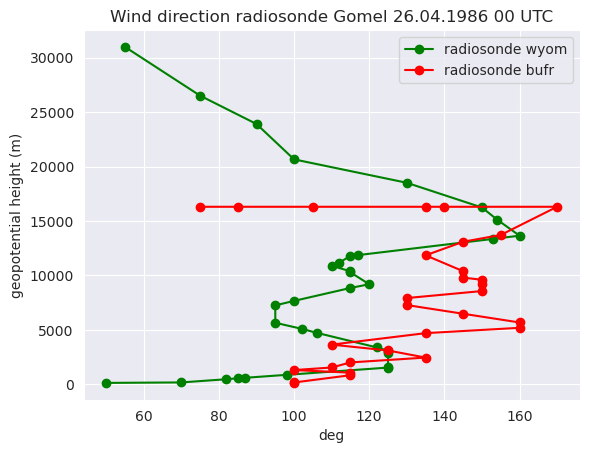

In [8]:


filename = "/home/norah/master/RS_data/RS_00_26_04_1986/BY_33041_52.45_31.0.txt"
b = datetime64('1986-04-26T00:00:00.000000000')
Radiosonde1 = Radiosonde(filename, 52.45,31.0,b)
Radiosonde2 = Radiosonde_csv("/home/norah/master/Rs_data_bufr/1986042600/52.45_31.0.csv",b)

Radiosonde1.find_data_no_horizontal_disp()


#plt.plot(wdir, height, "bo-", label="interpolated model")
   # plt.plot(wdir2,hy2, "ro-")
plt.plot(Radiosonde1.data["DRCT(deg)"],Radiosonde1.data["height(m)"], "go-", label="radiosonde wyom")
plt.plot(Radiosonde2.data["windDirection"],Radiosonde2.data["height"], "ro-", label="radiosonde bufr")
plt.legend()
plt.xlabel("deg")
plt.ylabel("geopotential height (m)")
plt.title("Wind direction radiosonde Gomel 26.04.1986 00 UTC")
#plt.savefig("/home/norah/master/pictures/00_26/wspeed_NO_1415.png")
plt.show()

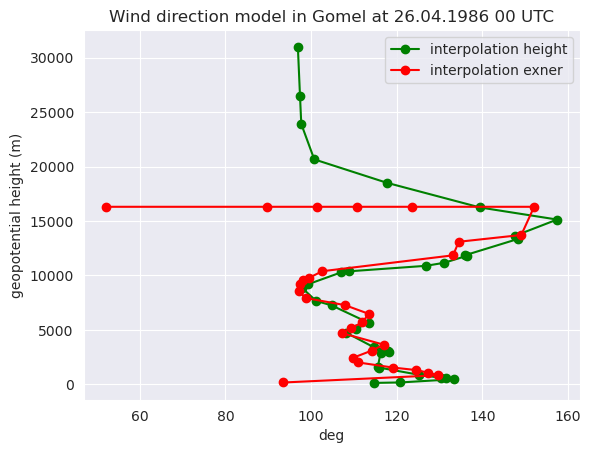

In [9]:
file="BY_33041_52.45_31.0_wdir_model.nc"  #Need to be changed for each station
limit=0

wind_data=xarray.open_mfdataset("/home/norah/master/data/no_hdisp_wdir_int/int_sonde_data00_26/"+file) 

b = datetime64('1986-04-26T00:00:00.000000000')
Radiosonde2 = Radiosonde_csv("/home/norah/master/Rs_data_bufr/1986042600/52.45_31.0.csv",b)
file_list1=file.strip("_wdir_model.nc")
file_list=file_list1.split("_")


wdir = wind_data["wdir_model"].values
height = wind_data["height"].values#plt.plot(wdir, height, "bo-", label="interpolated model")

file="/home/norah/master/data/trial_folder_bufr/wdir/2600_wdir/52.45_31.0_wdir_model.nc"  #Need to be changed for each station
limit=0

wind_data=xarray.open_mfdataset(file) 

file_list1=file.strip("_wdir_model.nc")
file_list=file_list1.split("_")


wdir_bufr = wind_data["wdir_model"].values
exner = wind_data["exner"].values

plt.plot(wdir%360,height, "go-", label="interpolation height")
plt.plot(wdir_bufr%360,Radiosonde2.data["height"][1:], "ro-", label="interpolation exner")
plt.legend()
plt.xlabel("deg")
plt.ylabel("geopotential height (m)")
plt.title("Wind direction model in Gomel at 26.04.1986 00 UTC")

plt.show()

Violinplots

In [5]:
#Making a list with all the time points
times_list=[]
time0 = datetime64('1986-04-26T00:00:00.000000000')

for i in range(0,25):

    times_list.append(time0)
    time0 = time0+np.timedelta64(12, 'h')

print(times_list)

[numpy.datetime64('1986-04-26T00:00:00.000000000'), numpy.datetime64('1986-04-26T12:00:00.000000000'), numpy.datetime64('1986-04-27T00:00:00.000000000'), numpy.datetime64('1986-04-27T12:00:00.000000000'), numpy.datetime64('1986-04-28T00:00:00.000000000'), numpy.datetime64('1986-04-28T12:00:00.000000000'), numpy.datetime64('1986-04-29T00:00:00.000000000'), numpy.datetime64('1986-04-29T12:00:00.000000000'), numpy.datetime64('1986-04-30T00:00:00.000000000'), numpy.datetime64('1986-04-30T12:00:00.000000000'), numpy.datetime64('1986-05-01T00:00:00.000000000'), numpy.datetime64('1986-05-01T12:00:00.000000000'), numpy.datetime64('1986-05-02T00:00:00.000000000'), numpy.datetime64('1986-05-02T12:00:00.000000000'), numpy.datetime64('1986-05-03T00:00:00.000000000'), numpy.datetime64('1986-05-03T12:00:00.000000000'), numpy.datetime64('1986-05-04T00:00:00.000000000'), numpy.datetime64('1986-05-04T12:00:00.000000000'), numpy.datetime64('1986-05-05T00:00:00.000000000'), numpy.datetime64('1986-05-05T1

1986-04-26T00:00:00.000000000
54.1_13.4_wdir_model.nc
1986-04-26T00:00:00.000000000
57.83_28.35_wdir_model.nc
1986-04-26T00:00:00.000000000
51.12_13.68_wdir_model.nc
1986-04-26T00:00:00.000000000
49.03_20.32_wdir_model.nc
1986-04-26T00:00:00.000000000
50.57_10.38_wdir_model.nc
1986-04-26T00:00:00.000000000
60.2_11.1_wdir_model.nc
1986-04-26T00:00:00.000000000
57.67_12.3_wdir_model.nc
1986-04-26T00:00:00.000000000
51.4_6.97_wdir_model.nc
1986-04-26T00:00:00.000000000
61.5_38.93_wdir_model.nc
1986-04-26T00:00:00.000000000
61.72_30.72_wdir_model.nc
1986-04-26T00:00:00.000000000
53.87_27.53_wdir_model.nc
1986-04-26T00:00:00.000000000
59.97_30.3_wdir_model.nc
1986-04-26T00:00:00.000000000
50.03_5.4_wdir_model.nc
1986-04-26T00:00:00.000000000
64.98_34.78_wdir_model.nc
1986-04-26T00:00:00.000000000
61.82_34.27_wdir_model.nc
1986-04-26T00:00:00.000000000
51.65_36.18_wdir_model.nc
1986-04-26T00:00:00.000000000
59.28_39.87_wdir_model.nc
1986-04-26T00:00:00.000000000
67.25_14.4_wdir_model.nc
1986

/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1986-05-02T00:00:00.000000000
56.52_21.02_wdir_model.nc
1986-05-02T00:00:00.000000000
51.65_36.18_wdir_model.nc
1986-05-02T00:00:00.000000000
59.28_39.87_wdir_model.nc
1986-05-02T00:00:00.000000000
54.53_9.55_wdir_model.nc
1986-05-02T00:00:00.000000000
48.25_11.55_wdir_model.nc
1986-05-02T00:00:00.000000000
52.1_5.18_wdir_model.nc
1986-05-02T00:00:00.000000000
59.98_30.6_wdir_model.nc
1986-05-02T00:00:00.000000000
52.72_7.32_wdir_model.nc
1986-05-02T00:00:00.000000000
54.7_20.62_wdir_model.nc
1986-05-02T00:00:00.000000000
59.42_24.8_wdir_model.nc
1986-05-02T00:00:00.000000000
48.25_16.37_wdir_model.nc
1986-05-02T00:00:00.000000000
49.7_7.33_wdir_model.nc
1986-05-02T00:00:00.000000000
52.48_13.42_wdir_model.nc
1986-05-02T00:00:00.000000000
54.62_39.72_wdir_model.nc
1986-05-02T00:00:00.000000000
56.97_24.07_wdir_model.nc
1986-05-02T00:00:00.000000000
54.75_17.53_wdir_model.nc
1986-05-02T00:00:00.000000000
54.75_32.07_wdir_model.nc
1986-05-02T00:00:00.000000000
52.4_20.97_wdir_model.nc
19

/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1986-05-02T12:00:00.000000000
51.65_36.18_wdir_model.nc
1986-05-02T12:00:00.000000000
59.28_39.87_wdir_model.nc
1986-05-02T12:00:00.000000000
54.53_9.55_wdir_model.nc
1986-05-02T12:00:00.000000000
48.25_11.55_wdir_model.nc
1986-05-02T12:00:00.000000000
52.1_5.18_wdir_model.nc
1986-05-02T12:00:00.000000000
59.98_30.6_wdir_model.nc
1986-05-02T12:00:00.000000000
52.72_7.32_wdir_model.nc
1986-05-02T12:00:00.000000000
54.7_20.62_wdir_model.nc
1986-05-02T12:00:00.000000000
59.42_24.8_wdir_model.nc
1986-05-02T12:00:00.000000000
48.25_16.37_wdir_model.nc
1986-05-02T12:00:00.000000000
49.7_7.33_wdir_model.nc
1986-05-02T12:00:00.000000000
52.48_13.42_wdir_model.nc
1986-05-02T12:00:00.000000000
54.62_39.72_wdir_model.nc
1986-05-02T12:00:00.000000000
56.97_24.07_wdir_model.nc
1986-05-02T12:00:00.000000000
54.75_17.53_wdir_model.nc
1986-05-02T12:00:00.000000000
54.75_32.07_wdir_model.nc
1986-05-02T12:00:00.000000000
52.4_20.97_wdir_model.nc
1986-05-02T12:00:00.000000000
62.4_25.68_wdir_model.nc
198

/tmp/ipykernel_3574019/1027607697.py:109: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  first_q = df.quantile(0.25)['Mean Absolute Error (deg)']
/tmp/ipykernel_3574019/1027607697.py:110: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  third_q = df.quantile(0.75)['Mean Absolute Error (deg)']
/tmp/ipykernel_3574019/1027607697.py:136: FutureWarning: The default value of numeric_only in DataFrameGroupBy.quantile is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_q1 = df.groupby(df.index).quantile(0.25)['Mean Absolute Error (de

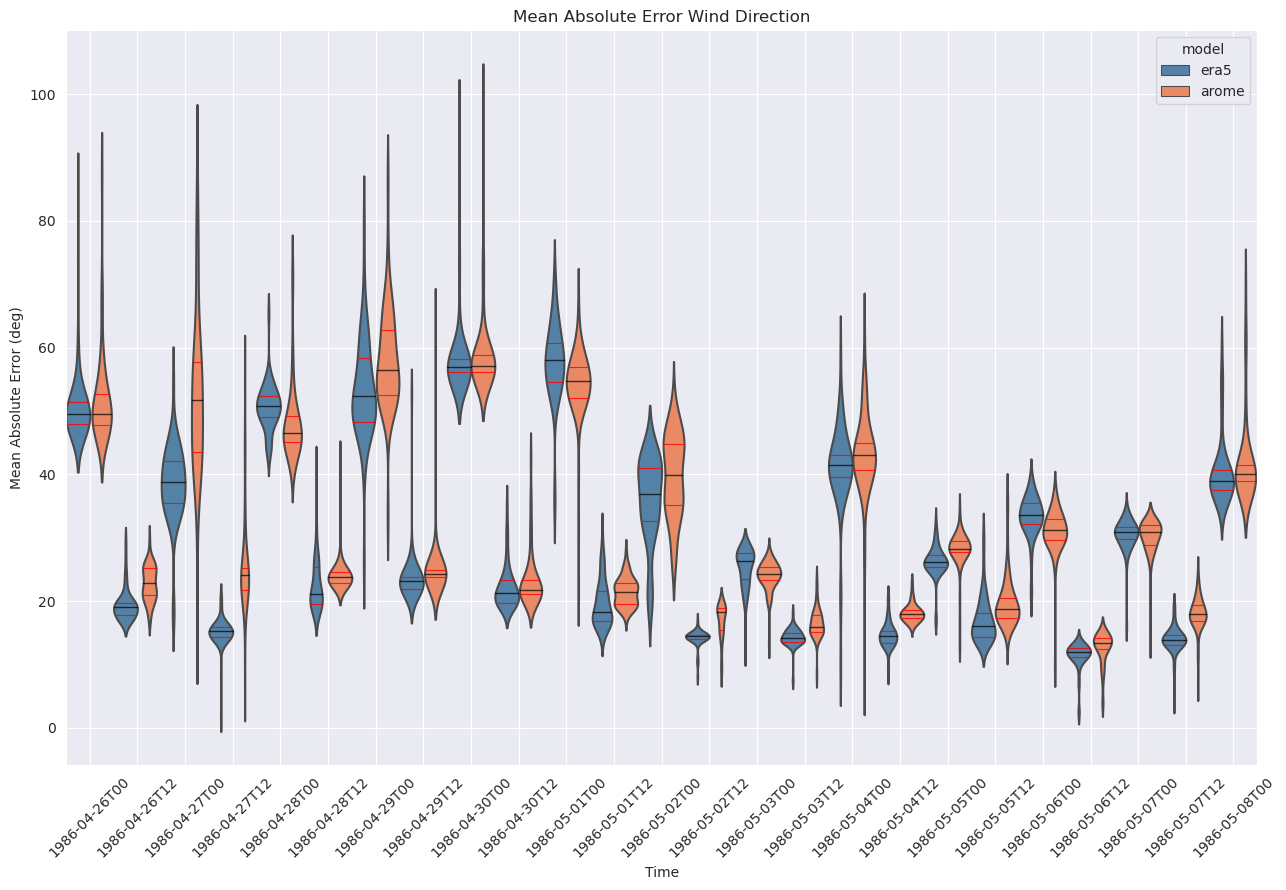

In [6]:
#Mean absolute and mean bias for all timepoints and for both era5 and arome
mean_bias_list = []
mean_bias_list_above = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]
height=[]


for i,times in enumerate(times_list):


    wdir_dist = []
    wdir_dist_above = []
    string=np.datetime_as_string(times_list[i], unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/"):
        radiosonde_files_wdir.append(file)
        print(times)
        print(file)
        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wdir/{day}{hour}_wdir/{file}")
        wind_data2=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/{file}")
        exner = wind_data["exner"].values

        file_list1=file.strip("_wdir_model.nc")
        wspeed_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file_list1}_wspeed_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0]+"_"+file_list[1])
        lat = float(file_list[0])
        long = float(file_list[1])
        #radiosonde_files_wdir.append(file)

        Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{long}.csv",times)

        wspeed = wspeed_data["wspeed_model"].values  

        k=0
        speed_av=[]
        for w, r in zip(wspeed, Radiosonde1.data["windSpeed"]):
            upper=1000
            lower=0

            if upper>Radiosonde1.data["height"][k]>lower:

                phi = w

                    
                speed_av.append(phi)
            k +=1
        av_speed= np.mean(speed_av)
        j=0
            
        if av_speed>2:
       
            wdir = wind_data["wdir_model"].values
            wdir2 = wind_data2["wdir_model"].values
            i=0
            for w, r in zip(wdir, Radiosonde1.data["windDirection"]):
                upper=3000
                lower=1000
                if upper>Radiosonde1.data["height"][i]>lower:

                    phi = abs(w%369-r%369)%369

                    if phi > 180:
                        phi = 360-phi
                        wdir_dist.append(phi)

                    else:
                        wdir_dist.append(phi)
                i +=1
            
            i=0
            for w, r in zip(wdir2, Radiosonde1.data["windDirection"]):
                upper=3000
                lower=1000
                if upper>Radiosonde1.data["height"][i]>lower:

                    phi = abs(w%369-r%369)%369

                    if phi > 180:
                        phi = 360-phi
                        wdir_dist_above.append(phi)

                    else:
                        wdir_dist_above.append(phi)
                i +=1
    
        mean_bias = np.mean(wdir_dist)
  
        mean_bias_above = np.mean(wdir_dist_above)


        mean_bias_list.append(mean_bias)
        height.append("era5")
        mean_bias_list.append(mean_bias_above)
        height.append("arome")
        time_list2.append(string)
        time_list2.append(string)

#Finding the IQR benchmark for all timesteps and radisondes
df = pd.DataFrame({"Mean Absolute Error (deg)": mean_bias_list, "Time":time_list2, "model":height})

first_q = df.quantile(0.25)['Mean Absolute Error (deg)']
third_q = df.quantile(0.75)['Mean Absolute Error (deg)']
outlier_all_lim_top = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim)

fig = plt.figure(figsize=[13,9])
#df = pd.DataFrame({"Mean Absolute Error (deg)": mean_bias_list, "Time":time_list2})
sns.set_style(style="darkgrid")
df.set_index('Time', inplace=True)
boxplot = sns.violinplot(x=df.index, y=df['Mean Absolute Error (deg)'], hue=df["model"], inner="quartile", palette=["steelblue", "coral"], width=1)
for l in boxplot.lines:
    l.set_linestyle('-')
    l.set_linewidth(0.8)
    l.set_color('red')
    l.set_alpha(0.8)

for l in boxplot.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1)
    l.set_color('black')
    l.set_alpha(0.7)


upper_bound=[outlier_all_lim]*len(np.unique(time_list2))
#sns.lineplot(x=np.unique(time_list2), y=upper_bound)

month_q1 = df.groupby(df.index).quantile(0.25)['Mean Absolute Error (deg)'].to_numpy()
month_q3 = df.groupby(df.index).quantile(0.75)['Mean Absolute Error (deg)'].to_numpy()
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1) #interquartile range
outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)
df_lim=pd.DataFrame({"lim_top":outlier_top_lim, "lim_bottom":outlier_bottom_lim, "date":np.unique(time_list2)})



#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Absolute Error Wind Direction")
plt.xticks(rotation=45)
plt.grid(axis="x") 
fig.tight_layout()
plt.show()

/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192

-1.4463972134193448


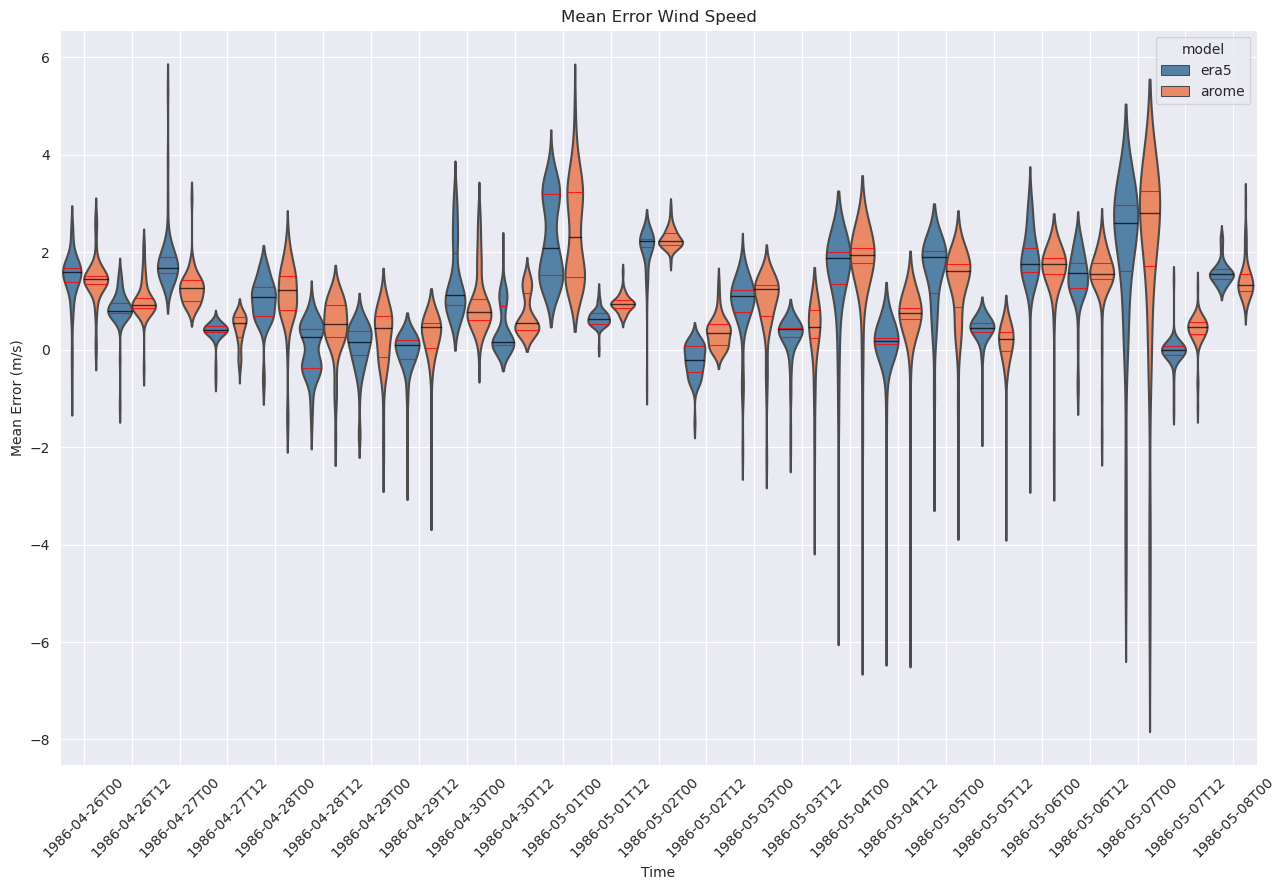

In [50]:
#Mean absolute bias for all timepoints
mean_bias_list = []
height=[]
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]


for i,times in enumerate(times_list):

    wdir_dist = []
    wdir_dist_above = []
    string=np.datetime_as_string(times_list[i], unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir(f"/home/norah/master/data/trial_folder_bufr/wspeed/{day}{hour}_wspeed/"):
        radiosonde_files_wdir.append(file)
        #b = datetime64('1986-05-01T00:00:00.000000000')
        wind_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file}")
        wind_data2=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_bufr/wspeed/{day}{hour}_wspeed/{file}")

        exner = wind_data["exner"].values

        file_list1=file.strip("_wspeed_model.nc")
        wspeed_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file_list1}_wspeed_model.nc")
        file_list=file_list1.split("_")
        names.append(file_list[0]+"_"+file_list[1])
        lat = float(file_list[0])
        long = float(file_list[1])
        #radiosonde_files_wdir.append(file)

        Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{long}.csv",times)

        wspeed = wspeed_data["wspeed_model"].values  

        k=0
        speed_av=[]
        for w, r in zip(wspeed, Radiosonde1.data["windSpeed"]):
            upper=1000
            lower=0

            if upper>Radiosonde1.data["height"][k]>lower:

                phi = w

                    
                speed_av.append(phi)
            k +=1
        av_speed= np.mean(speed_av)
        j=0
            
        if av_speed>2:
       
            wdir = wind_data["wspeed_model"].values
            wdir2 = wind_data2["wspeed_model"].values

            i=0
            for w, r in zip(wdir, Radiosonde1.data["windSpeed"]):
                upper=1000
                lower=100
                if upper>Radiosonde1.data["height"][i]>lower:

                    phi = w-r

                    wdir_dist.append(phi)
                i +=1

            i=0
            for w, r in zip(wdir2, Radiosonde1.data["windSpeed"]):
                upper=1000
                lower=100
                if upper>Radiosonde1.data["height"][i]>lower:

                    phi = w-r

    
                    wdir_dist_above.append(phi)

                i +=1
    
        mean_bias = np.mean(wdir_dist)
        mean_bias_above = np.mean(wdir_dist_above)
     
        mean_bias_list.append(mean_bias)
        height.append("era5")
        mean_bias_list.append(mean_bias_above)
        height.append("arome")
        time_list2.append(string)
        time_list2.append(string)

#Finding the IQR benchmark for all timesteps and radisondes
df = pd.DataFrame({"Mean Error (m/s)": mean_bias_list, "Time":time_list2, "model":height})

first_q = df.quantile(0.25)['Mean Error (m/s)']
third_q = df.quantile(0.75)['Mean Error (m/s)']
outlier_all_lim_top = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim)

fig = plt.figure(figsize=[13,9])
#df = pd.DataFrame({"Mean Absolute Error (m/s)": mean_bias_list, "Time":time_list2})
sns.set_style(style="darkgrid")
df.set_index('Time', inplace=True)
boxplot = sns.violinplot(x=df.index, y=df['Mean Error (m/s)'], hue=df["model"], inner="quartile", palette=["steelblue", "coral"], width=1)
for l in boxplot.lines:
    l.set_linestyle('-')
    l.set_linewidth(0.8)
    l.set_color('red')
    l.set_alpha(0.8)

for l in boxplot.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1)
    l.set_color('black')
    l.set_alpha(0.7)


upper_bound=[outlier_all_lim]*len(np.unique(time_list2))
#sns.lineplot(x=np.unique(time_list2), y=upper_bound)

month_q1 = df.groupby(df.index).quantile(0.25)['Mean Error (m/s)'].to_numpy()
month_q3 = df.groupby(df.index).quantile(0.75)['Mean Error (m/s)'].to_numpy()
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1) #interquartile range
outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)
df_lim=pd.DataFrame({"lim_top":outlier_top_lim, "lim_bottom":outlier_bottom_lim, "date":np.unique(time_list2)})



#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Speed")
plt.xticks(rotation=45)
plt.grid(axis="x") 
fig.tight_layout()
plt.show()

/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_3115327/2771395115.py:98: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  firs

4.731988762994683


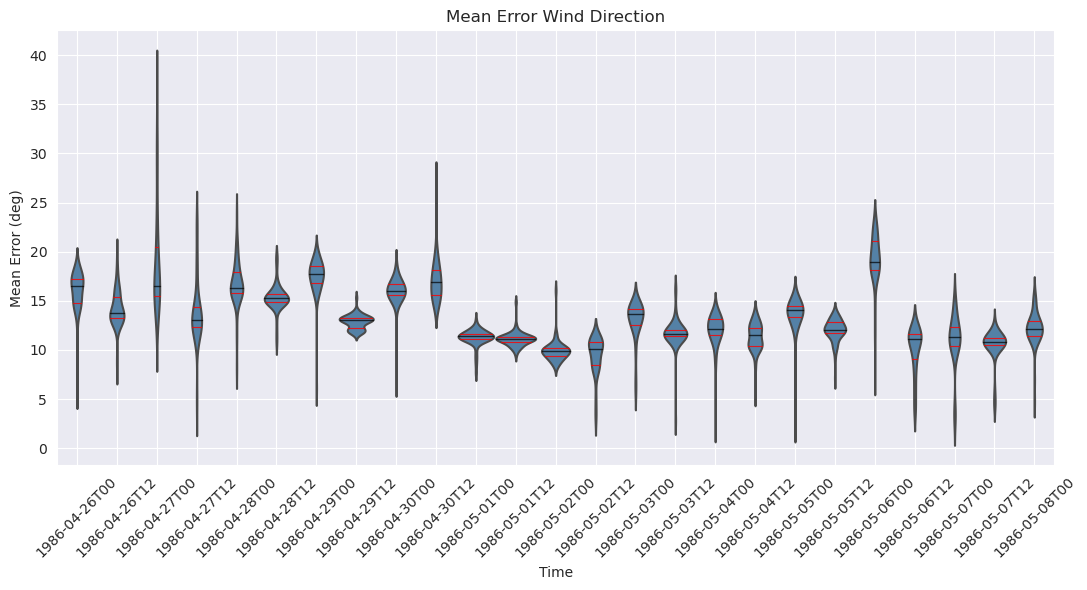

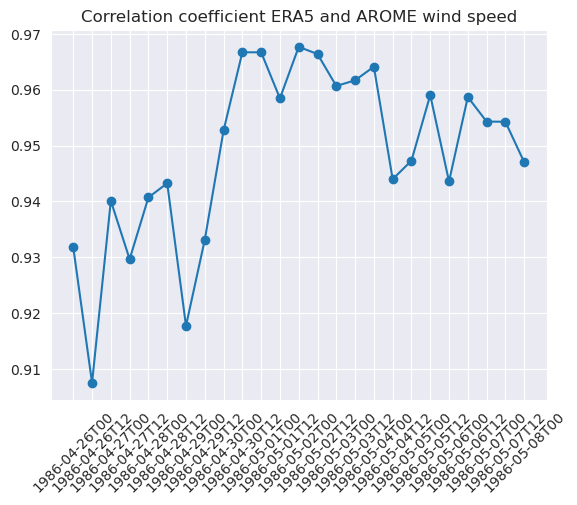

In [11]:
# Comparing wind direction in arome and era5

mean_bias_list = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]
era5=[]
arome=[]
corr=[]
for i,times in enumerate(times_list):

    era5=[]
    arome=[]
    wdir_dist = []
    string=np.datetime_as_string(times_list[i], unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir(f"/home/norah/master/data/trial_folder_era5/wdir/{day}{hour}_wdir/"):
        if file in os.listdir(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/"):

            radiosonde_files_wdir.append(file)
            #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wdir/{day}{hour}_wdir/{file}")
     
            wind_data2=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/{file}")
            exner = wind_data["exner"].values

            file_list1=file.strip("_wdir_model.nc")
            wspeed_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file_list1}_wspeed_model.nc")
            wspeed_data2=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_bufr/wspeed/{day}{hour}_wspeed/{file_list1}_wspeed_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0]+"_"+file_list[1])
            lat = float(file_list[0])
            long = float(file_list[1])
            #radiosonde_files_wdir.append(file)

            Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{long}.csv",times)

            wspeed = wspeed_data["wspeed_model"].values  

            k=0
            speed_av=[]
            for w, r in zip(wspeed, Radiosonde1.data["windSpeed"]):
                upper=1000
                lower=0

                if upper>Radiosonde1.data["height"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>2:
       
                wdir = wind_data["wdir_model"].values
                wdir2 = wind_data2["wdir_model"].values
                wspeed1 = wspeed_data["wspeed_model"].values
                wspeed2 = wspeed_data2["wspeed_model"].values
                for w, r in zip(wspeed2, wspeed1):
                    era5.append(r)
                    arome.append(w)
                i=0
                for w, r in zip(wdir2, wdir):
                    #era5.append(r%360)
                    #arome.append(w%360)

                    upper=5000
                    lower=100
                    if upper>Radiosonde1.data["height"][i]>lower:

                        phi = abs(w%369-r%369)%360

                        if phi > 180:
                            phi = 360-phi
                            wdir_dist.append(phi)

                        else:
                            wdir_dist.append(phi)
                    i +=1
    
            mean_bias = np.mean(wdir_dist)

            mean_bias_list.append(mean_bias)
    
            time_list2.append(string)

    corr.append(np.corrcoef(arome, era5)[0][1])
#Finding the IQR benchmark for all timesteps and radisondes
df = pd.DataFrame({"Mean Error (deg)": mean_bias_list, "Time":time_list2})

first_q = df.quantile(0.25)['Mean Error (deg)']
third_q = df.quantile(0.75)['Mean Error (deg)']
outlier_all_lim_top = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim)

fig = plt.figure(figsize=[11,6])
df = pd.DataFrame({"Mean Error (deg)": mean_bias_list, "Time":time_list2})
sns.set_style(style="darkgrid")
df.set_index('Time', inplace=True)
boxplot = sns.violinplot(x=df.index, y=df['Mean Error (deg)'], inner="quartile", color="steelblue", width=1)
for l in boxplot.lines:
    l.set_linestyle('-')
    l.set_linewidth(0.8)
    l.set_color('red')
    l.set_alpha(0.8)

for l in boxplot.lines[1::3]:
    l.set_linestyle('-')
    l.set_linewidth(1)
    l.set_color('black')
    l.set_alpha(0.7)


upper_bound=[outlier_all_lim]*len(np.unique(time_list2))
#sns.lineplot(x=np.unique(time_list2), y=upper_bound)

month_q1 = df.groupby(df.index).quantile(0.25)['Mean Error (deg)'].to_numpy()
month_q3 = df.groupby(df.index).quantile(0.75)['Mean Error (deg)'].to_numpy()
outlier_top_lim = month_q3 + 1.5 * (month_q3 - month_q1) #interquartile range
outlier_bottom_lim = month_q1 - 1.5 * (month_q3 - month_q1)
df_lim=pd.DataFrame({"lim_top":outlier_top_lim, "lim_bottom":outlier_bottom_lim, "date":np.unique(time_list2)})



#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Direction")
plt.xticks(rotation=45)
plt.grid(axis="x") 
fig.tight_layout()
plt.show()

plt.plot(np.unique(df.index), corr, "-o")
plt.title(f"Correlation coefficient ERA5 and AROME wind speed")
plt.xticks(rotation=45)
plt.show()

1986-04-26T00:00:00.000000000
1986-04-26T12:00:00.000000000
1986-04-27T00:00:00.000000000
1986-04-27T12:00:00.000000000
1986-04-28T00:00:00.000000000
1986-04-28T12:00:00.000000000
1986-04-29T00:00:00.000000000
1986-04-29T12:00:00.000000000
1986-04-30T00:00:00.000000000
1986-04-30T12:00:00.000000000
1986-05-01T00:00:00.000000000
1986-05-01T12:00:00.000000000
1986-05-02T00:00:00.000000000


/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1986-05-02T12:00:00.000000000


/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1986-05-03T00:00:00.000000000
1986-05-03T12:00:00.000000000
1986-05-04T00:00:00.000000000
1986-05-04T12:00:00.000000000
1986-05-05T00:00:00.000000000
1986-05-05T12:00:00.000000000
1986-05-06T00:00:00.000000000
1986-05-06T12:00:00.000000000
1986-05-07T00:00:00.000000000
1986-05-07T12:00:00.000000000
1986-05-08T00:00:00.000000000


/tmp/ipykernel_2324468/1908302851.py:138: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


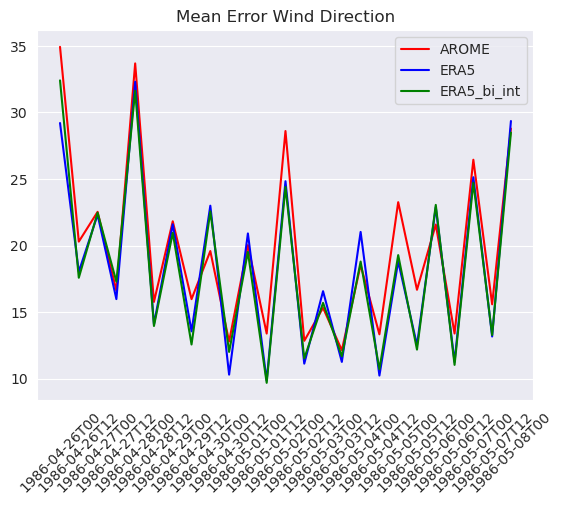

In [80]:
# Comparing the mean error in arome and in era5

mean_bias_list = []
mean_bias_list_era = []
mean_bias_list_era_int = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]


for i,times in enumerate(times_list):
    print(times)
    wdir_dist = []
    wdir_dist_era = []
    wdir_dist_era_int = []
    string=np.datetime_as_string(times_list[i], unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir(f"/home/norah/master/data/trial_folder_era5/wdir/{day}{hour}_wdir/"):
        if file in os.listdir(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/"):

            radiosonde_files_wdir.append(file)
            #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wdir/{day}{hour}_wdir/{file}")
     
            wind_data2=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/{file}")
            wind_data3=xarray.open_mfdataset(f"/home/norah/master/data/biint_era5/wdir/{day}{hour}_wdir/{file}")

            exner = wind_data["exner"].values

            file_list1=file.strip("_wdir_model.nc")
            wspeed_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file_list1}_wspeed_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0]+"_"+file_list[1])
            lat = float(file_list[0])
            long = float(file_list[1])
            #radiosonde_files_wdir.append(file)

            Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{long}.csv",times)

            wspeed = wspeed_data["wspeed_model"].values  

            k=0
            speed_av=[]
            for w, r in zip(wspeed, Radiosonde1.data["windSpeed"]):
                upper=1000
                lower=0

                if upper>Radiosonde1.data["height"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>2:
       
                wdir = wind_data["wdir_model"].values
                wdir2 = wind_data2["wdir_model"].values
                wdir3=wind_data3["wdir_model"].values
                i=0
                for w, r in zip(wdir2, Radiosonde1.data["windDirection"]):
                    upper=5000
                    lower=100
                    if upper>Radiosonde1.data["height"][i]>lower:

                        phi = abs(w%369-r%369)%369

                        if phi > 180:
                            phi = 360-phi
                            wdir_dist.append(-phi)

                        else:
                            wdir_dist.append(phi)
                    i +=1
                
                i=0
                for w, r in zip(wdir, Radiosonde1.data["windDirection"]):
                    upper=5000
                    lower=100
                    if upper>Radiosonde1.data["height"][i]>lower:

                        phi = abs(w%369-r%369)%369

                        if phi > 180:
                            phi = 360-phi
                            wdir_dist_era.append(-phi)

                        else:
                            wdir_dist_era.append(phi)
                    i +=1

                i=0
                for w, r in zip(wdir3, Radiosonde1.data["windDirection"]):
                    upper=5000
                    lower=100
                    if upper>Radiosonde1.data["height"][i]>lower:

                        phi = abs(w%369-r%369)%369

                        if phi > 180:
                            phi = 360-phi
                            wdir_dist_era_int.append(-phi)

                        else:
                            wdir_dist_era_int.append(phi)
                    i +=1
    
    mean_bias = np.mean(wdir_dist)
    mean_bias_era = np.mean(wdir_dist_era)
    mean_bias_era_int = np.mean(wdir_dist_era_int)

    mean_bias_list.append(mean_bias)
    mean_bias_list_era.append(mean_bias_era)
    mean_bias_list_era_int.append(mean_bias_era_int)
    time_list2.append(string)
        
#Finding the IQR benchmark for all timesteps and radisondes
df = pd.DataFrame({"Mean Error (deg)": mean_bias_list, "Time":time_list2})
df2 = pd.DataFrame({"Mean Error (deg)": mean_bias_list_era, "Time":time_list2})
df3 = pd.DataFrame({"Mean Error (deg)": mean_bias_list_era_int, "Time":time_list2})

plt.plot(df["Time"], df["Mean Error (deg)"], "r-", label="AROME")
plt.plot(df["Time"], df2["Mean Error (deg)"], "b-",label="ERA5")
plt.plot(df["Time"], df3["Mean Error (deg)"], "g-",label="ERA5_bi_int")

#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Direction")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="x") 
fig.tight_layout()
plt.show()

1986-04-26T00:00:00.000000000
1986-04-26T12:00:00.000000000
1986-04-27T00:00:00.000000000
1986-04-27T12:00:00.000000000
1986-04-28T00:00:00.000000000
1986-04-28T12:00:00.000000000
1986-04-29T00:00:00.000000000
1986-04-29T12:00:00.000000000
1986-04-30T00:00:00.000000000
1986-04-30T12:00:00.000000000
1986-05-01T00:00:00.000000000
1986-05-01T12:00:00.000000000
1986-05-02T00:00:00.000000000


/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1986-05-02T12:00:00.000000000


/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


1986-05-03T00:00:00.000000000
1986-05-03T12:00:00.000000000
1986-05-04T00:00:00.000000000
1986-05-04T12:00:00.000000000
1986-05-05T00:00:00.000000000
1986-05-05T12:00:00.000000000
1986-05-06T00:00:00.000000000
1986-05-06T12:00:00.000000000
1986-05-07T00:00:00.000000000
1986-05-07T12:00:00.000000000
1986-05-08T00:00:00.000000000


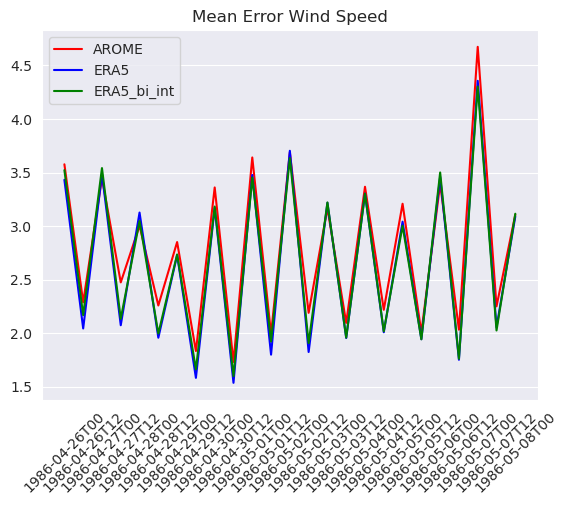

In [92]:
# Comparing the mean error in arome and in era5

mean_bias_list = []
mean_bias_list_era = []
mean_bias_list_era_int = []
longitude = []
names = []
time_list2=[]
radiosonde_files_wdir=[]


for i,times in enumerate(times_list):
    print(times)
    wdir_dist = []
    wdir_dist_era = []
    wdir_dist_era_int = []
    string=np.datetime_as_string(times_list[i], unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]    

    for file in os.listdir(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/"):
        if file in os.listdir(f"/home/norah/master/data/trial_folder_bufr/wspeed/{day}{hour}_wspeed/"):

            radiosonde_files_wdir.append(file)
            #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file}")
     
            wind_data2=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_bufr/wspeed/{day}{hour}_wspeed/{file}")
            wind_data3=xarray.open_mfdataset(f"/home/norah/master/data/biint_era5/wspeed/{day}{hour}_wspeed/{file}")

            exner = wind_data["exner"].values

            file_list1=file.strip("_wspeed_model.nc")
            wspeed_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file_list1}_wspeed_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0]+"_"+file_list[1])
            lat = float(file_list[0])
            long = float(file_list[1])
            #radiosonde_files_wdir.append(file)

            Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{long}.csv",times)

            wspeed = wspeed_data["wspeed_model"].values  

            k=0
            speed_av=[]
            for w, r in zip(wspeed, Radiosonde1.data["windSpeed"]):
                upper=1000
                lower=0

                if upper>Radiosonde1.data["height"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>2:
       
                wdir = wind_data["wspeed_model"].values
                wdir2 = wind_data2["wspeed_model"].values
                wdir3=wind_data3["wspeed_model"].values
                i=0
                for w, r in zip(wdir2, Radiosonde1.data["windSpeed"]):
                    upper=5000
                    lower=100
                    if upper>Radiosonde1.data["height"][i]>lower:

                        phi = abs(w-r)

                        #if phi > 180:
                            #phi = 360-phi
                        wdir_dist.append(phi)

                        #else:
                           # wdir_dist.append(phi)
                    i +=1
                
                i=0
                for w, r in zip(wdir, Radiosonde1.data["windSpeed"]):
                    upper=5000
                    lower=100
                    if upper>Radiosonde1.data["height"][i]>lower:

                        phi = abs(w-r)

                        #if phi > 180:
                            #phi = 360-phi
                        wdir_dist_era.append(phi)

                        #else:
                           # wdir_dist_era.append(phi)
                    i +=1

                i=0
                for w, r in zip(wdir3, Radiosonde1.data["windSpeed"]):
                    upper=5000
                    lower=100
                    if upper>Radiosonde1.data["height"][i]>lower:

                        phi = abs(w-r)

                        #if phi > 180:
                            #phi = 360-phi
                        wdir_dist_era_int.append(phi)

                        #else:
                            #wdir_dist_era_int.append(phi)
                    i +=1
    
    mean_bias = np.mean(wdir_dist)
    mean_bias_era = np.mean(wdir_dist_era)
    mean_bias_era_int = np.mean(wdir_dist_era_int)

    mean_bias_list.append(mean_bias)
    mean_bias_list_era.append(mean_bias_era)
    mean_bias_list_era_int.append(mean_bias_era_int)
    time_list2.append(string)
        
#Finding the IQR benchmark for all timesteps and radisondes
df = pd.DataFrame({"Mean Error (deg)": mean_bias_list, "Time":time_list2})
df2 = pd.DataFrame({"Mean Error (deg)": mean_bias_list_era, "Time":time_list2})
df3 = pd.DataFrame({"Mean Error (deg)": mean_bias_list_era_int, "Time":time_list2})

plt.plot(df["Time"], df["Mean Error (deg)"], "r-", label="AROME")
plt.plot(df["Time"], df2["Mean Error (deg)"], "b-",label="ERA5")
plt.plot(df["Time"], df3["Mean Error (deg)"], "g-",label="ERA5_bi_int")

#plt.title(f"Mean Absolute Bias Wind Direction between {lower} and {upper} meters altitude")
plt.title(f"Mean Error Wind Speed")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="x") 
fig.tight_layout()
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/si

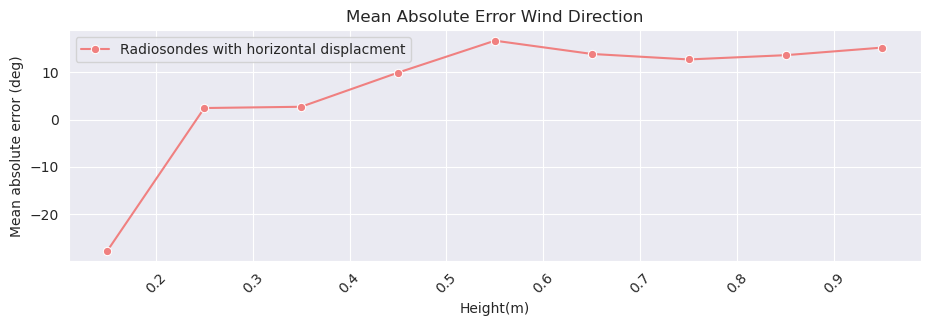

In [7]:
#Mean absolute bias for all timepoints for height with binning. This one is not working properly
no_mean_bias_list = []
mean_bias_list = []
height_bin = []
names = []
time_list2=[]
stations_wdir=[]

bin_list = np.arange(1,0,-0.1)


for k in tqdm(bin_list):
  
    wdir_dist = []
    
    for i,times in enumerate(times_list):
    
        string=np.datetime_as_string(times_list[i], unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12]    

        for file in os.listdir(f"/home/norah/master/data/trial_folder_era5/wdir/{day}{hour}_wdir/"):

        #b = datetime64('1986-05-01T00:00:00.000000000')
            wind_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wdir/{day}{hour}_wdir/{file}")
            file_list1=file.strip("_wdir_model.nc")
            wspeed_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file_list1}_wspeed_model.nc")
            exner = wind_data["exner"].values
            
            file_list1=file.strip("_wdir_model.nc")
            file_list=file_list1.split("_")
            names.append(file_list[0])
            lat = float(file_list[0])
            long = float(file_list[1])

            if file_list[1] not in stations_wdir:
                Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{long}.csv",times)
                speed_av=[]
            #Radiosonde1 = Radiosonde(filename, 60.2,11.1,b)

            #Radiosonde1.find_horizontal_disp()      
          
         
            #wdir = wind_data["wdir_model"].values

            #else:
                wspeed = wspeed_data["wspeed_model"].values
                wdir = wind_data["wdir_model"].values   
                
                b=0
                for w, r in zip(wspeed, Radiosonde1.data["windSpeed"]):
              

                    if 1000>Radiosonde1.data["height"][b]>0:

                        phi = w

                    
                        speed_av.append(phi)
                    b +=1
                av_speed= np.mean(speed_av)
                j=0
              
                if av_speed>2:
          
                    for w, r in zip(wdir, Radiosonde1.data["windDirection"]):
                        upper=k
                        lower=k-0.2
                        if upper>exner[j]>lower:
                          
                            phi = abs(w-r)%369

                            if phi > 180:
                                phi = 360-phi
                                wdir_dist.append(-phi)

                            else:
                                wdir_dist.append(phi)
                        j +=1

    
    mean_bias = np.mean(wdir_dist)

    no_mean_bias_list.append(mean_bias)

    height_bin.append(k-0.1/2)

fig = plt.figure(figsize=[11,3])
df2 = pd.DataFrame({"Mean absolute error (deg)": no_mean_bias_list, "Height(m)":height_bin})

sns.set_style(style="darkgrid")

sns.lineplot(data=df2, x="Height(m)", y="Mean absolute error (deg)", color="lightcoral", marker="o")
#plt.plot(Radiosonde1.data["Temp(C)"][0:15]+273.15, Radiosonde1.data["height(m)"][0:15], "ro-")
  
plt.legend(labels=["Radiosondes with horizontal displacment", "Radiosondes without horizontal displacment"])
plt.title(f"Mean Absolute Error Wind Direction")
plt.xticks(rotation=45)
plt.show()

In [83]:
#Makinga list of all unique radiosonde stations
sonde_lat=[]
for time in times_list:

    string=np.datetime_as_string(time, unit='h')
    month=string[5]+string[6]
    day=string[8]+string[9]
    hour=string[11]+string[12]   
    for sonde in os.listdir(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}"):
        file_list=sonde.strip(".csv")
        file_list1=file_list.split("_")
        sonde_lat.append(str(f"{file_list1[0]}_{file_list1[1]}"))
    #wyom_sonde_files[time]=sonde_lat

all_sonde_files=np.unique(sonde_lat)
#wyom_sonde_files[times]

/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/norah/.conda/envs/master3/lib/python3.11/site-packages/numpy/core/_methods.py:192

(array([], dtype=int64),)
45.523920710990716


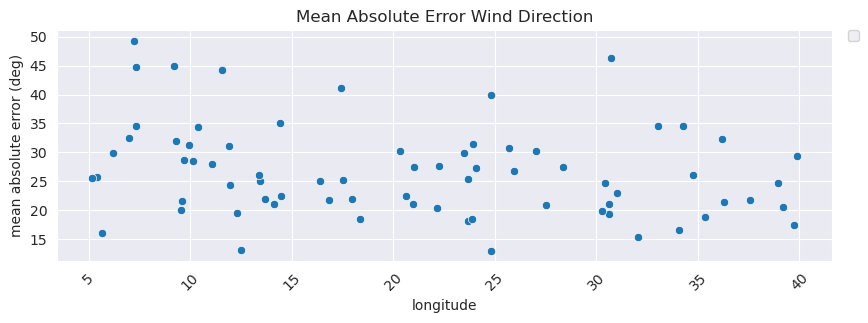

<AxesSubplot: xlabel='mean absolute error (deg)'>

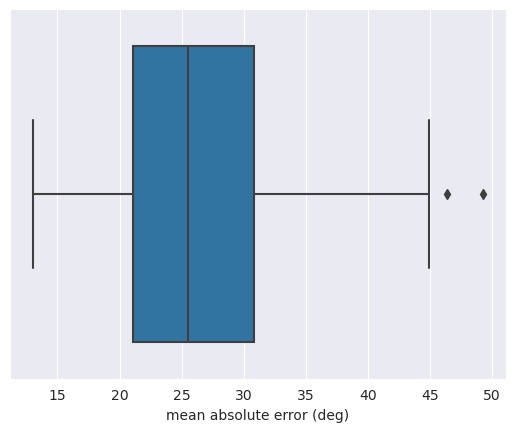

In [85]:
#Mean absolute error scatterplot
mean_bias_list = []
longitude = []
names = []
time_list2=[]


    
for file1 in all_sonde_files:

    wdir_dist = []   
    
    for times in times_list:
     
        string=np.datetime_as_string(times, unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12] 

        
        if os.path.isfile(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/{file1}_wdir_model.nc") is True:

          
            wind_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_bufr/wdir/{day}{hour}_wdir/{file1}_wdir_model.nc")
            wdir = wind_data["wdir_model"].values
            wspeed_data=xarray.open_mfdataset(f"/home/norah/master/data/trial_folder_era5/wspeed/{day}{hour}_wspeed/{file1}_wspeed_model.nc")

            file_list1=file1.strip("_wspeed_model.nc")
            file_list=file_list1.split("_")
            lat = float(file_list[0])
            lon = float(file_list[1])
            #list_pos=np.where(wyom_sonde_files[times]==f"{file_list1[0]}_{file_list1[1]}")
            #list_pos=np.squeeze(list_pos)

            #if np.size(list_pos)>0:

            Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{lon}.csv",times)
    
            if "wdir_model" in wspeed_data:
         
                wspeed = wspeed_data["wdir_model"].values

            else:
                wspeed = wspeed_data["wspeed_model"].values  

            k=0
            speed_av=[]
            for w, r in zip(wspeed, Radiosonde1.data["windSpeed"]):
                upper=1000
                lower=10

                if upper>Radiosonde1.data["height"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>5:
                for w, r in zip(wdir, Radiosonde1.data["windDirection"]):

                    upper=5000
                    lower=100

                    if upper>Radiosonde1.data["height"][j]>lower:

                        phi = abs(w-r)%369

                        if phi > 180:
                            phi = 360-phi
                            wdir_dist.append(phi)
                            
                        else:
                            wdir_dist.append(phi)
                    j +=1


    longitude.append(Radiosonde1.lon)
    names.append(file_list[0])
    mean_bias_list.append(np.mean(wdir_dist))




colors = ['green','orange','brown','dodgerblue','red', "pink", "lightgreen", "blue", "cyan", "teal", "grey", "black", "violet"]
contries =[]
fig = plt.figure(figsize=[10,3])
df = pd.DataFrame({"mean absolute error (deg)": mean_bias_list, "longitude":longitude})
z = np.abs(stats.zscore(df["mean absolute error (deg)"]))
print(np.where(z>2))
sns.set_style(style="darkgrid")
sns.scatterplot(data=df, x="longitude", y="mean absolute error (deg)")

first_q = df.quantile(0.25)['mean absolute error (deg)']
third_q = df.quantile(0.75)['mean absolute error (deg)']
outlier_all_lim = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim_bottom = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim)

  
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Mean Absolute Error Wind Direction")
plt.xticks(rotation=45)


plt.show()
sns.boxplot(data=df, x=df["mean absolute error (deg)"])

/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  phi = abs(w-r)/r
/tmp/ipykernel_2324468/318106075.py:69: RuntimeW

1.240778607135884


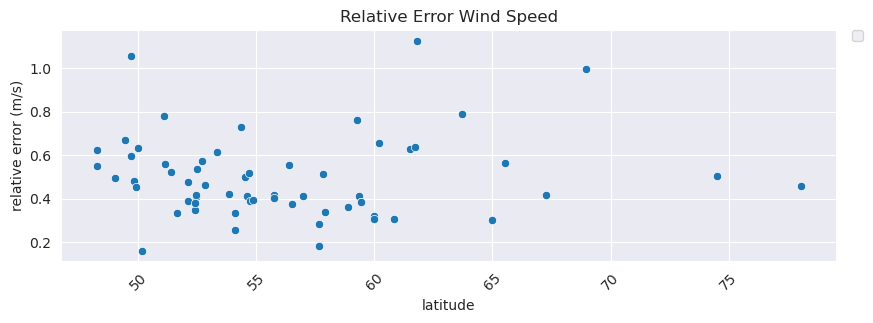

In [90]:
#Mean absolute bias
mean_bias_list = []
longitude = []
names = []
time_list2=[]


    
for file1 in all_sonde_files:

    wdir_dist = []   
    
    for times in times_list:
     
        string=np.datetime_as_string(times, unit='h')
        time_list2.append(string)
        month=string[5]+string[6]
        day=string[8]+string[9]
        hour=string[11]+string[12] 

        
        if os.path.isfile(f"/home/norah/master/data/biint_era5/wspeed/{day}{hour}_wspeed/{file1}_wspeed_model.nc") is True:

          
            wind_data=xarray.open_mfdataset(f"/home/norah/master/data/biint_era5/wspeed/{day}{hour}_wspeed/{file1}_wspeed_model.nc")

            file_list1=file1.strip("_wspeed_model.nc")
            file_list=file_list1.split("_")
            lat = float(file_list[0])
            lon = float(file_list[1])
            #list_pos=np.where(wyom_sonde_files[times]==f"{file_list1[0]}_{file_list1[1]}")
            #list_pos=np.squeeze(list_pos)

            #if np.size(list_pos)>0:

            Radiosonde1 = Radiosonde_csv(f"/home/norah/master/Rs_data_bufr/1986{month}{day}{hour}/{lat}_{lon}.csv",times)
    
            if "wdir_model" in wind_data:
         
                wdir = wind_data["wdir_model"].values

            else:
                wdir = wind_data["wspeed_model"].values  

            k=0
            speed_av=[]
            for w, r in zip(wdir, Radiosonde1.data["windSpeed"]):
                upper=1000
                lower=100

                if upper>Radiosonde1.data["height"][k]>lower:

                    phi = w

                    
                    speed_av.append(phi)
                k +=1
            av_speed= np.mean(speed_av)
            j=0
            
            if av_speed>5:
                for w, r in zip(wdir, Radiosonde1.data["windSpeed"]):

                    upper=5000
                    lower=100

                    if upper>Radiosonde1.data["height"][j]>lower:

                        phi = abs(w-r)/r

                        wdir_dist.append(phi)
                            
                    j +=1


    longitude.append(Radiosonde1.lat)
    names.append(file_list[0])
    mean_bias_list.append(np.mean(wdir_dist))




colors = ['green','orange','brown','dodgerblue','red', "pink", "lightgreen", "blue", "cyan", "teal", "grey", "black", "violet"]
contries =[]
fig = plt.figure(figsize=[10,3])
df = pd.DataFrame({"relative error (m/s)": mean_bias_list, "latitude":longitude})
sns.set_style(style="darkgrid")
sns.scatterplot(data=df, x="latitude", y="relative error (m/s)")

first_q = df.quantile(0.25)['relative error (m/s)']
third_q = df.quantile(0.75)['relative error (m/s)']
outlier_all_lim = third_q + 1.5 * (third_q - first_q) #interquartile range
outlier_all_lim_bottom = first_q - 1.5 * (third_q - first_q)
print(outlier_all_lim)

  
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Relative Error Wind Speed")
plt.xticks(rotation=45)


plt.show()

Spatial Dependence

In [19]:
import os

os.putenv("UDUNITS2_XML_PATH", "/home/norah/.conda/envs/master3/share/udunits/udunits2.xml")

config = "/lustre/storeB/project/fou/kl/cerad/Meteorology/AROME-CHERNOBYL/cdmGribReaderConfigEC_Era5.xml"
    
arome_file = f"/lustre/storeB/project/fou/kl/cerad/Meteorology/AROME-CHERNOBYL/ERA5/ma198605060012.mars"
    
ds = xarray.open_dataset(arome_file, config=config, engine="fimex")#.isel(time=slice(12, -1))
#ds = xarray.open_dataset(arome_file).isel(time=slice(12, -1))

b = datetime64(f'1986-05-06T00:00:00.000000000')

#ds= ds.isel(latitude=34, longitude=34, latitude1=34, longitude1=34)


In [34]:

spatial_list_x = []
spatial_list_y = []
move=[]

for i in range(3,10):

    ds2= ds.isel(latitude=i, longitude=34, latitude1=i, longitude1=i, hybrid0=1)

    spatial_list_x.append(ds2["x_wind_ml"].values[0])
    spatial_list_y.append(ds2["y_wind_ml"].values[0])
    wdir = (90-np.arctan2(spatial_list_y, spatial_list_x)*180.0/math.pi+180)%360
    move.append(i)
    

print(wdir)
plt.plot()


[-2.59, -2.68, -2.69, -2.62, -2.49, -2.27, -1.94]
[-2.5, -2.31, -2.21, -2.21, -2.33, -2.54, -2.84]
[46.01298288 49.24062421 50.59479746 49.85198529 46.90123646 41.7871844
 34.33692787]
